data cleaninig

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\admin\Documents\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [5]:
df.isnull().sum()
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
cols=df.select_dtypes(include="object").columns


In [8]:
b=[]
for i in cols:
    if len(df[i].unique()) ==2:
        b.append(i)

In [9]:
for i in b:
    c=df[i].unique()
    print(c)
    if c[0] in  ["Yes","No"]:
        df[i]=df[i].map({"Yes":1,"No":0})
        
    else:
        df[i]=df[i].map({"Male":1,"Female":0})
    

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [11]:
d=df.iloc[:,-2:-1]

In [12]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')

In [13]:
cols=df.select_dtypes(include="object").columns
i
for i in cols:
    print(df[i].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [14]:
df.drop("customerID",axis=1,inplace=True)


label encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cols:
    if i!= "customerID":
        le.fit(df[i])
        df[i]=le.transform(df[i])

#model training

In [16]:
x=df.iloc[:,:-1]
print(x.iloc[1:2,:].columns)
y=df.iloc[:,-1]

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [20]:
import tensorflow as tf

In [21]:
from tensorflow import keras

In [22]:
from tensorflow.keras import layers,Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout



In [23]:
model=Sequential()
model.add(Dense(64,activation="relu",input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(32,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1,activation="sigmoid"))

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [25]:
history=model.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6956 - loss: 0.6792 - val_accuracy: 0.7445 - val_loss: 0.6035
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7322 - loss: 0.5817 - val_accuracy: 0.7445 - val_loss: 0.5840
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7419 - loss: 0.5712 - val_accuracy: 0.7445 - val_loss: 0.5865
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7250 - loss: 0.5885 - val_accuracy: 0.7445 - val_loss: 0.5761
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7260 - loss: 0.5885 - val_accuracy: 0.7445 - val_loss: 0.5720
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7352 - loss: 0.5785 - val_accuracy: 0.7445 - val_loss: 0.5711
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7390 - loss: 0.5744 - val_accuracy: 0.7445 - val_loss: 0.5693
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7466 - loss: 0.5664 - val_accuracy: 0.

In [26]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7071 - loss: 0.6079
Test accuracy: 0.7154


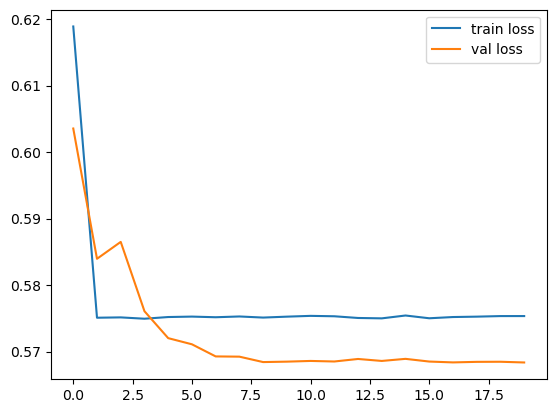

In [27]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [28]:
y_pred = model.predict(x_test)
y_pred_labels = (y_pred > 0.5).astype(int)
len(y_pred_labels)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


1409

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       0.72      1.00      0.83      1008
           1       0.00      0.00      0.00       401

    accuracy                           0.72      1409
   macro avg       0.36      0.50      0.42      1409
weighted avg       0.51      0.72      0.60      1409



C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
x_test.iloc[1:2,:-1]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
1414,1,0,0,0,35,1,2,1,0,0,2,2,2,0,0,0,2,95.5


In [31]:
new_data = [0, 0, 1, 1, 40, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 26.2, 1048]
new_data = np.array(new_data).reshape(1, -1)

prediction = model.predict(new_data)
print("Predicted:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted: [[0.25755823]]


In [32]:
x_test.iloc[1:2,:]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1414,1,0,0,0,35,1,2,1,0,0,2,2,2,0,0,0,2,95.5,3418.2


In [33]:
data=np.array([1,0,1,1,10,1,2,2,1,1,1,1,1,1,0,1,3,24.4,253.9]).reshape(1,-1)
a=model.predict(data)
if a>0.5:
    print(1)
else:
    print(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
0


In [34]:
import pickle

In [35]:
import joblib
joblib.dump(model, "churn_model.pkl")

['churn_model.pkl']

In [36]:
with open("fare_model.pkl", "wb") as f:
    pickle.dump(model, f)

data scaleing

In [37]:
df=df.dropna()

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [40]:
"""s=StandardScaler()
s.fit(df)
df=pd.DataFrame(s.transform(df),columns=df.columns)"""

's=StandardScaler()\ns.fit(df)\ndf=pd.DataFrame(s.transform(df),columns=df.columns)'

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

logistic regressor model

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr=LogisticRegression()

In [44]:
lr.fit(x_train,y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
lr.score(x_test,y_test)*100

80.52594171997157

In [46]:
lr.score(x_train,y_train)*100


80.07111111111112

decision tree model

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt=DecisionTreeClassifier()

In [49]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
dt.score(x_train,y_train)*100

99.73333333333333

In [51]:
dt.score(x_test,y_test)*100

74.05828002842928

Random forest model

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf=RandomForestClassifier()

In [54]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
rf.score(x_test,y_test)*100

79.74413646055437

In [56]:
rf.score(x_train,y_train)*100

99.71555555555555

SVM

In [57]:
from sklearn.svm import SVC

In [58]:
sv=SVC()

In [59]:
sv.fit(x_train,y_train)

SVC()

In [60]:
sv.score(x_train,y_train)*100

73.29777777777777

In [61]:
sv.score(x_test,y_test)*100

73.91613361762616

from above result we conclude that cnn model best for this dataset for churn prediction